# Intro to Data Sciecne (71253) - Problem Set 6


In this problem set we'll continue to work with the diabetes data set from the previous problem set. This time we will try and predict which people suffer from diabetes.

### Saar Pardo

*** 

## 1. Regressing against indivdual variables

### 1.1 We'll again focus on the variables BMI, glucose, insulin, and Age.  
### Regress each individual variable against the variable 'outcome' (which indicates which patients have diabetes)
### What are the coefficients (a,b) or (intercept, slope) for each one of the fits?

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [11]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


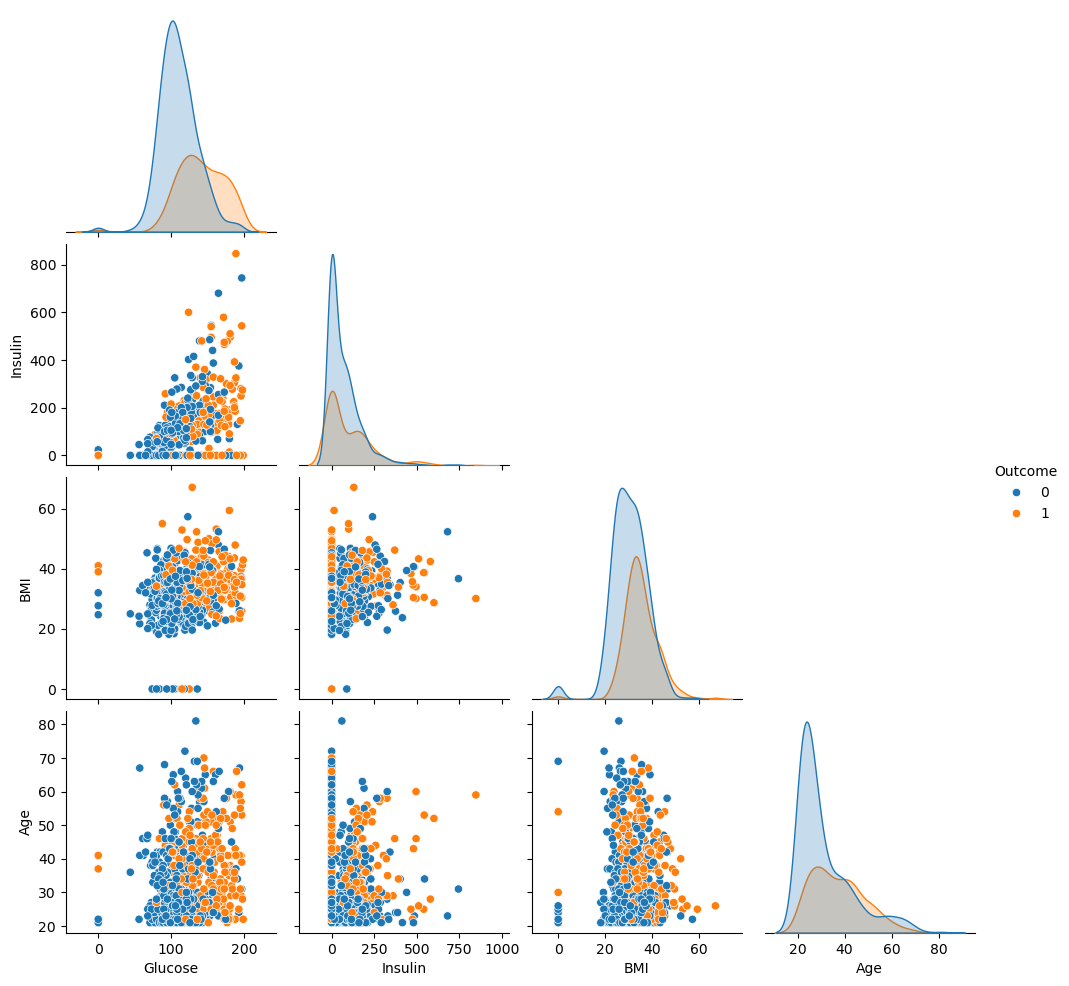

In [12]:
sns.pairplot(data=df[['Outcome','Glucose','Insulin','BMI','Age']],hue='Outcome',corner=True)

In [13]:
def logistic_a_b(x_list, y):
    X = df[x_list]
    X = sm.add_constant(X)
    y = df[y]
    
    model = sm.Logit(y, X)
    result = model.fit()
    print(result.summary())
    print(f"Interecept coeff: {result.params['const']}")
    for i in range(0,len(x_list)):
        print(f"{x_list[i]} slope coeff: {result.params[x_list[i]]}")

In [14]:
logistic_a_b(['BMI'], 'Outcome')

Optimization terminated successfully.
         Current function value: 0.599423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                 0.07325
Time:                        14:55:10   Log-Likelihood:                -460.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.457e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6864      0.409     -9.014      0.000      -4.488      -2.885
BMI            0.0935      0.

In [15]:
logistic_a_b(['Glucose'], 'Outcome')

Optimization terminated successfully.
         Current function value: 0.526510
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                  0.1860
Time:                        14:55:10   Log-Likelihood:                -404.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.418e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3501      0.421    -12.713      0.000      -6.175      -4.525
Glucose        0.0379      0.

In [16]:
logistic_a_b(['Insulin'], 'Outcome')

Optimization terminated successfully.
         Current function value: 0.638548
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                 0.01276
Time:                        14:55:10   Log-Likelihood:                -490.41
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 0.0003709
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8145      0.094     -8.632      0.000      -0.999      -0.630
Insulin        0.0023      0.

In [17]:
logistic_a_b(['Age'], 'Outcome')

Optimization terminated successfully.
         Current function value: 0.618959
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                 0.04304
Time:                        14:55:10   Log-Likelihood:                -475.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 6.177e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0475      0.239     -8.572      0.000      -2.516      -1.579
Age            0.0420      0.

### 1.2 Use a permutation test to compute a p-value for the slope obtained for each of the variables.  
### Based on your results, which variable(s) are indeed predictive of diabetes?   

In [19]:
def logistic(x, y, df):
    X = df[x]
    X = sm.add_constant(X)
    y = df[y]
    model = sm.Logit(y, X)
    result = model.fit(disp=False)  # disp: Suppress output during fitting
    coeffs = []
    coeffs.append(result.params['const'])
    coeffs.append(result.params[x])
    return coeffs

def permutation_test(x, y, df):
    per_df = df[[x, y]].copy()
    runs = 1000
    diffs = np.zeros(runs)
    for ii in range(runs):
        per_df['x_shuffled'] = per_df[x].sample(frac=1, replace=False).values
        my_model = logistic('x_shuffled', y, per_df)
        diffs[ii] = my_model[1]

    moe = logistic(x, y, df)[1]
    larger = np.where(diffs >= moe, 1, 0)
    p_val = np.sum(larger) / runs
    print(f'The p-value for {x} slope coeff {moe:.3f} is {p_val:.3f}')

In [20]:
permutation_test('Age', 'Outcome', df)

The p-value for Age slope coeff 0.042 is 0.000


In [21]:
permutation_test('Glucose', 'Outcome', df)

The p-value for Glucose slope coeff 0.038 is 0.000


In [22]:
permutation_test('BMI', 'Outcome', df)

The p-value for BMI slope coeff 0.094 is 0.000


In [23]:
permutation_test('Insulin', 'Outcome', df)

The p-value for Insulin slope coeff 0.002 is 0.000


### 1.3 Using your fits, predict which people have diabetes.  
### How accurate are the predictions based on each of the variables?

In [25]:
age_coeffs = logistic('Age', 'Outcome', df)
print (f' Diabetes_predicted = {age_coeffs[0]:.2f} + {age_coeffs[1]:.2f}*Age')

 Diabetes_predicted = -2.05 + 0.04*Age


In [26]:
Glu_coeffs = logistic('Glucose', 'Outcome', df)
print (f' Diabetes_predicted = {Glu_coeffs[0]:.2f} + {Glu_coeffs[1]:.2f}*Glucose')

 Diabetes_predicted = -5.35 + 0.04*Glucose


In [27]:
bmi_coeffs = logistic('BMI', 'Outcome', df)
print (f' Diabetes_predicted = {bmi_coeffs[0]:.2f} + {bmi_coeffs[1]:.2f}*BMI')

 Diabetes_predicted = -3.69 + 0.09*BMI


In [28]:
ins_coeffs = logistic('Insulin', 'Outcome', df)
print (f' Diabetes_predicted = {ins_coeffs[0]:.2f} + {ins_coeffs[1]:.4f}*Insulin')

 Diabetes_predicted = -0.81 + 0.0023*Insulin


 Based on my predicting models diabete is common among grown people, high glucose, high BMI or high insulin

*** 

## (BONUS) 2. Regressing against multiple variables

Since the course schedule was delayed this year, we'll only cover multiple regression after this problem set is due. 
Therefore, this part is optional.  
Attempeting this part and studying the posted solution may be useful for your final project or future data analysis.

### 2.1 Now perform a (multiple) logistic regression of diabetes jointly against all of the predictors considered in problem 1. 
### What are the coefficients (a,b1, b2,...) for each one of the fits?

In [34]:
explantories = ['Glucose','BMI','Age','Insulin']
logistic_a_b(explantories, 'Outcome')

Optimization terminated successfully.
         Current function value: 0.490871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:                  0.2411
Time:                        14:55:20   Log-Likelihood:                -376.99
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.185e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5207      0.678    -12.576      0.000      -9.849      -7.193
Glucose        0.0340      0.

### 2.2 Compare the slopes from the individual regression to the ones from the multiple regression. 
### Are the identical or different? Why? 

there are diffrences in slopes between individual regression and the multiple reggrestion 
because adding more variables to individual model clean the covariance between explantories so the slope in full model describes cleaner part of the explained variance 

### 2.3 Regularized regression:
- Repeat the multiple logistic regression, but using Lasso regression (l1 regularization) 
- Vary the strength of the regularization (parameter cost; using the parameter C in the LogisticRegression function of sklearn).
- How do the coefficiets depend on the strength of the penalty? Why?
- How does the goodness of the fit depend on the strength of the penalty? Why?


In [152]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split


# standardize the data by computing the z score 
stand_data = df.apply(lambda x:(x-x.mean())/x.std(), axis=0)

# input (rest of the vairable)
X = stand_data.iloc[:, :-1]
#output - (Outcome)
Y = stand_data.iloc[:, -1]

In [154]:
# split the data into training and testing groups
(x_train, 
 x_test, 
 y_train, 
 y_test) = train_test_split(X, Y, test_size = 0.2)
 
# print("Train data shape of X = % s and Y = % s : "%(
#     x_train.shape, y_train.shape))
 
# print("Test data shape of X = % s and Y = % s : "%(
#     x_test.shape, y_test.shape))

In [156]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)
 
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
 
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
 
# Putting together the coefficients and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
lreg_coefficient['Type'] = 'Linear (MSE: '+ str(np.around(mean_squared_error,2))+')'

In [162]:
alpha_low = 0.025
lasso1 = Lasso(alpha = alpha_low)
lasso1.fit(x_train, y_train)
y_pred1 = lasso1.predict(x_test)

mean_squared_error1 = np.mean((y_pred1 - y_test)**2)

lasso_coeff1 = pd.DataFrame()
lasso_coeff1["Columns"] = X.columns
lasso_coeff1['Coefficient Estimate'] = pd.Series(lasso1.coef_)
lasso_coeff1['Type'] = r'Lasso, $\lambda$ = '+ f'{alpha_low} (MSE: {str(np.around(mean_squared_error1,2))})'

alpha_high = 0.1
lasso2 = Lasso(alpha = alpha_high)
lasso2.fit(x_train, y_train)
y_pred2 = lasso2.predict(x_test)

mean_squared_error2 = np.mean((y_pred2 - y_test)**2)

lasso_coeff2 = pd.DataFrame()
lasso_coeff2["Columns"] = X.columns
lasso_coeff2['Coefficient Estimate'] = pd.Series(lasso2.coef_)
lasso_coeff2['Type'] = r'Lasso, $\lambda$ = '+ f'{alpha_high} (MSE: {str(np.around(mean_squared_error2,2))})'


<Axes: xlabel='Columns', ylabel='Coefficient Estimate'>

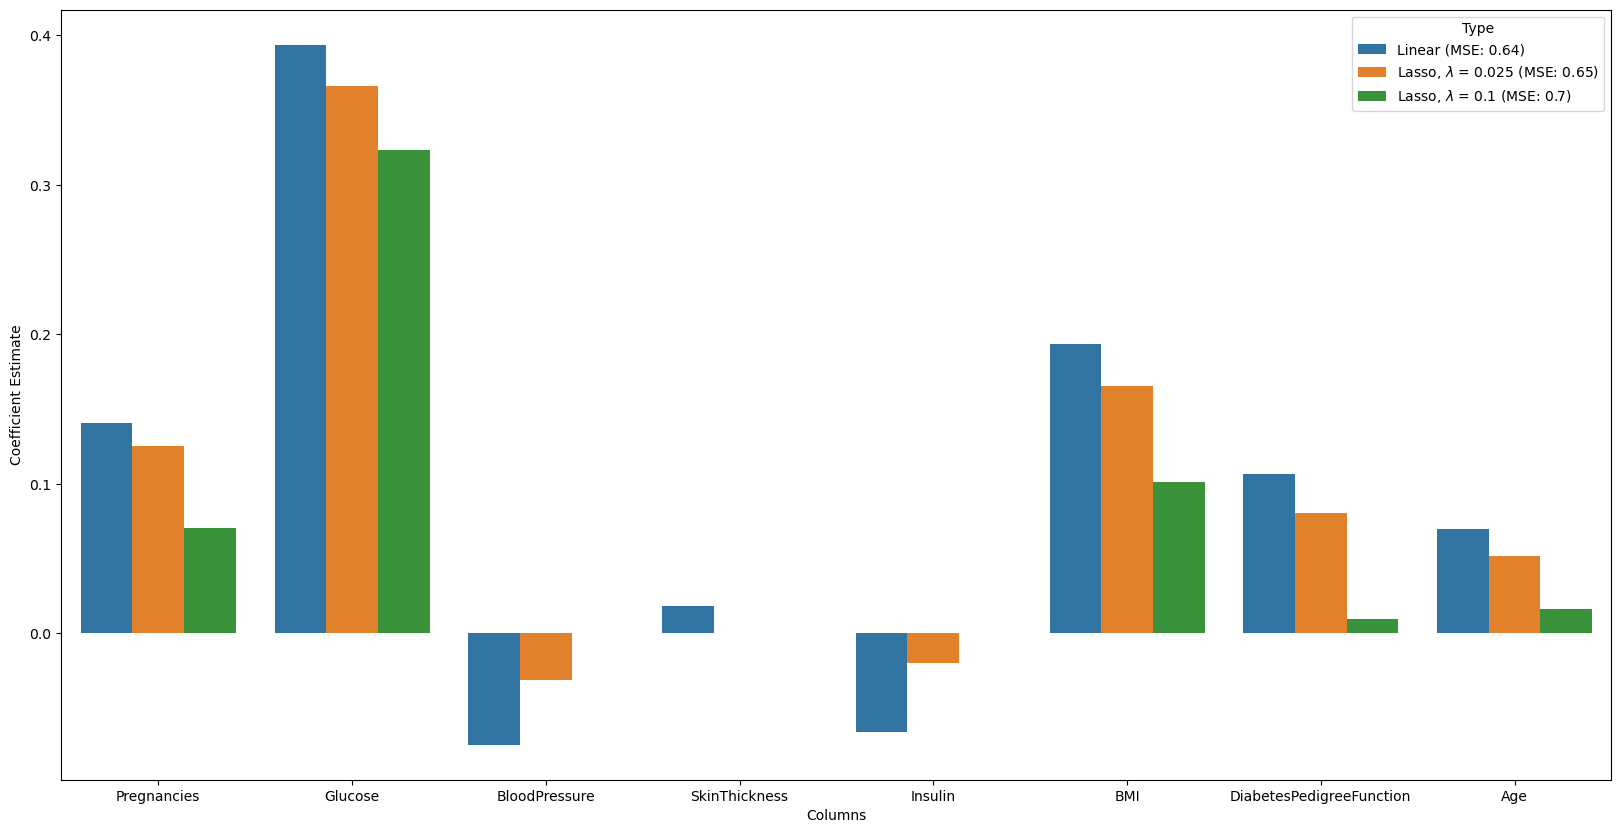

In [164]:
frames = [lreg_coefficient,
         lasso_coeff1,
          lasso_coeff2
         ]
all_coefs = pd.concat(frames)
# plotting the coefficient scores
fig, ax = plt.subplots(figsize =(20, 10))
 
sns.barplot(x = all_coefs["Columns"],
            y = all_coefs['Coefficient Estimate'],
            hue = all_coefs['Type']) 

- The coefficiets decrease with increasing the penalty strength (alpha) becuse they become less significant with high "punishment"
- The goodness of the fit also decrease with increasing the penalty strength (alpha) beacuase we use less variables to explain the `Outcome` variance 